# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


OBS: Algumas informações foram validadas no site `IMDB`

# Carregamento e tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv', parse_dates=['date_added'])

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [6]:
df_tratado = df.copy()

In [7]:
df_tratado.columns = ['id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'dt_disponibilizacao',
       'ano_lancamento', 'classificacao', 'duracao', 'categorias', 'descricao']


In [8]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Perguntas

## 1 - Quantos registros e quantas colunas existem no dataset?

In [10]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
linhas, colunas = df_tratado.shape
print(f'Total de linhas: {linhas}')
print(f'Total de colunas: {colunas}')

Total de linhas: 8807
Total de colunas: 12


## 2- Existem colunas com valores ausentes? Quais?

Resposta: Sim! Colunas: diretor, elenco, pais, dt_disponibilizacao, classificao, duracao

In [12]:
df_tratado.isna().sum()

id                        0
tipo                      0
titulo                    0
diretor                2634
elenco                  825
pais                    831
dt_disponibilizacao      10
ano_lancamento            0
classificacao             4
duracao                   3
categorias                0
descricao                 0
dtype: int64

In [13]:
df_tratado.isna().sum() / linhas * 100

id                      0.000000
tipo                    0.000000
titulo                  0.000000
diretor                29.908028
elenco                  9.367549
pais                    9.435676
dt_disponibilizacao     0.113546
ano_lancamento          0.000000
classificacao           0.045418
duracao                 0.034064
categorias              0.000000
descricao               0.000000
dtype: float64

## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?

In [14]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df_tratado['tipo'].value_counts()

tipo
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [16]:
# normalize = True, retorna a porcentagem
df_tratado['tipo'].value_counts(normalize=True) * 100

tipo
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

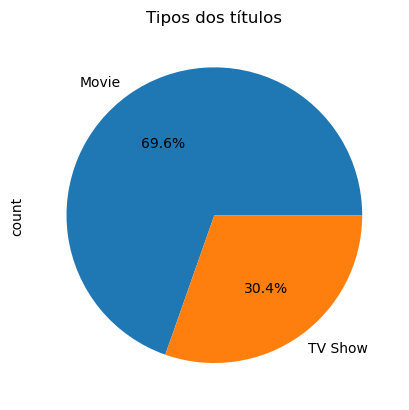

In [17]:
df_tratado['tipo'].value_counts().plot(kind='pie', title='Tipos dos títulos', autopct='%1.1f%%');

## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [18]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df_sem_pais = df_tratado.loc[df_tratado['pais'].isna()]

In [20]:
df_sem_pais['tipo'].value_counts()

tipo
Movie      440
TV Show    391
Name: count, dtype: int64

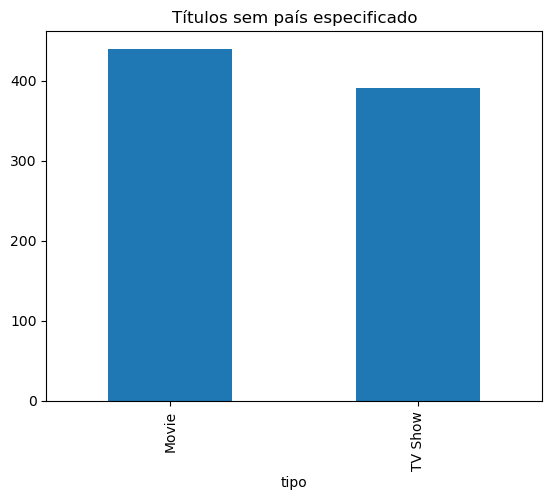

In [21]:
df_sem_pais['tipo'].value_counts().plot(kind='bar', title='Títulos sem país especificado');

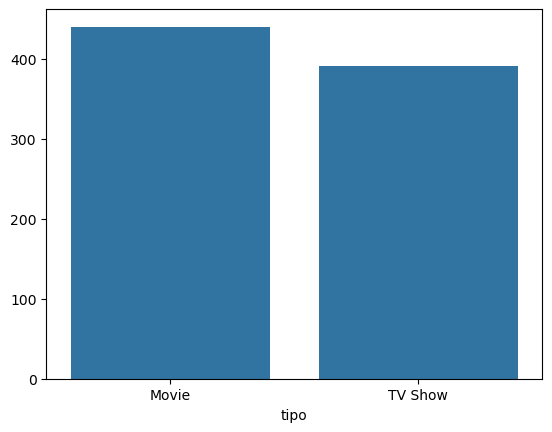

In [22]:
sns.barplot(x=df_sem_pais['tipo'].value_counts().index, y=df_sem_pais['tipo'].value_counts().values);

## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?

Resposta: O primeiro filme foi disponibilizado em 01-01-2008. Seu título é: To and From New York. País de origem: Estados Unidos.

In [23]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
df_movies = df_tratado.loc[df_tratado['tipo'] == 'Movie']

In [41]:
df_movies['dt_disponibilizacao'].min()

Timestamp('2008-01-01 00:00:00')

In [26]:
filtro = df_movies['dt_disponibilizacao'] == df_movies['dt_disponibilizacao'].min()
df_movies[filtro]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?

Resposta: Rajiv Chilaka. País: Índia.

In [42]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
df_tratado['diretor'].value_counts()

diretor
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [45]:
df_tratado.query("diretor == 'Rajiv Chilaka'").head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...


## 7 - Qual é o filme de maior duração? E o de menor duração?

Resposta: O Filme de maior duração é: **The School of Mischief**. E o de menor duração é:**Silent**

In [46]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
# Copiando o DataFrame (sem referenciar o original) shell copy
df_tratado_movie = df_tratado.query("tipo == 'Movie'").copy()

In [48]:
df_tratado_movie.loc[df_tratado_movie['duracao'].isna()]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [49]:
df_tratado_movie.loc[[5541, 5794, 5813], 'duracao'] = ['74 min', '84 min', '66 min' ]

In [50]:
df_tratado_movie.loc[[5541, 5794, 5813]]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [51]:
df_tratado_movie.loc[[5541, 5794, 5813], 'classificacao'] = np.nan

In [52]:
df_tratado_movie.loc[[5541, 5794, 5813]]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [53]:
df_tratado_movie['duracao_min'] =  df_tratado_movie['duracao'].str.replace(' min', '').astype(np.int64)

In [54]:
df_tratado_movie.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [55]:
df_tratado_movie['duracao_min'].max()

312

In [56]:
df_tratado_movie['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [57]:
df_tratado_movie.loc[2491]

id                                                                 s2492
tipo                                                               Movie
titulo                                            The School of Mischief
diretor                                           Houssam El-Din Mustafa
elenco                 Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...
pais                                                               Egypt
dt_disponibilizacao                                  2020-05-21 00:00:00
ano_lancamento                                                      1973
classificacao                                                      TV-14
duracao                                                          253 min
categorias                        Comedies, Dramas, International Movies
descricao              A high school teacher volunteers to transform ...
duracao_min                                                          253
Name: 2491, dtype: object

In [41]:
# calculando o tempo em minutos
4 * 60 + 11

251

In [58]:
df_tratado_movie['duracao_min'].sort_values()

3777      3
2713      5
1484      8
1557      9
3535     10
       ... 
2484    233
2487    237
2491    253
717     273
4253    312
Name: duracao_min, Length: 6131, dtype: int64

In [61]:
df_tratado_movie.loc[3777]

id                                                                 s3778
tipo                                                               Movie
titulo                                                            Silent
diretor                                Limbert Fabian, Brandon Oldenburg
elenco                                                               NaN
pais                                                       United States
dt_disponibilizacao                                  2019-06-04 00:00:00
ano_lancamento                                                      2014
classificacao                                                       TV-Y
duracao                                                            3 min
categorias                    Children & Family Movies, Sci-Fi & Fantasy
descricao              "Silent" is an animated short film created by ...
duracao_min                                                            3
Name: 3777, dtype: object

## 8 - Qual o tempo médio de duração de um filme?

Resposta: O tempo médio de duração de um filme é de **99 minutos**.

<Axes: xlabel='duracao_min'>

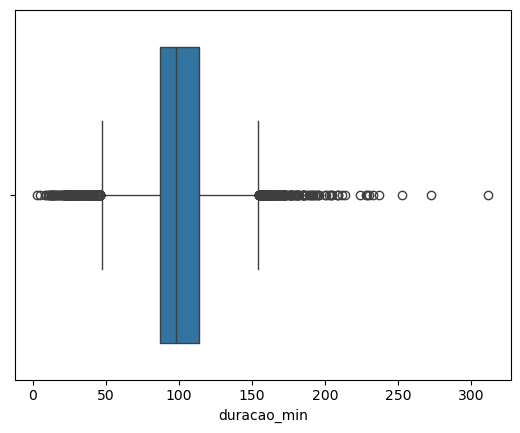

In [62]:
sns.boxplot(x=df_tratado_movie['duracao_min'])

In [63]:
df_tratado_movie['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [69]:
df_tratado_movie.loc[717]

id                                                                  s718
tipo                                                               Movie
titulo                                       Headspace: Unwind Your Mind
diretor                                                              NaN
elenco                 Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...
pais                                                                 NaN
dt_disponibilizacao                                  2021-06-15 00:00:00
ano_lancamento                                                      2021
classificacao                                                       TV-G
duracao                                                          273 min
categorias                                                 Documentaries
descricao              Do you want to relax, meditate or sleep deeply...
duracao_min                                                          273
Name: 717, dtype: object

In [66]:
df_tratado_movie['duracao_min'].describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duracao_min, dtype: float64

In [67]:
round(df_tratado_movie['duracao_min'].mean(),2)

99.56

## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).

Resposta: Os 3 países que mais produzem séries de TV são: Estados Unidos, Reino Unido e Japão.

In [68]:
df_tratado.loc[df_tratado['tipo'] == 'TV Show', 'pais'].value_counts(dropna=True)

pais
United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 196, dtype: int64

## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?

Resposta: 2020.

In [70]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
df_tratado['pais'].value_counts().sort_index()

pais
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: count, Length: 748, dtype: int64

In [72]:
df_tratado_brasil = df_tratado.loc[df_tratado['pais'].notna() & df_tratado['pais'].str.contains('Brazil')].copy()

In [73]:
df_tratado_brasil.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece",2021-08-13,2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,2021-08-05,2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,2021-06-22,2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,2021-06-02,2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...","Mexico, Brazil",2021-05-12,2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...


In [74]:
df_tratado_brasil['dt_disponibilizacao'].dt.year.value_counts()

dt_disponibilizacao
2020    27
2019    22
2018    19
2017    16
2021    11
2016     2
Name: count, dtype: int64

<Axes: xlabel='dt_disponibilizacao'>

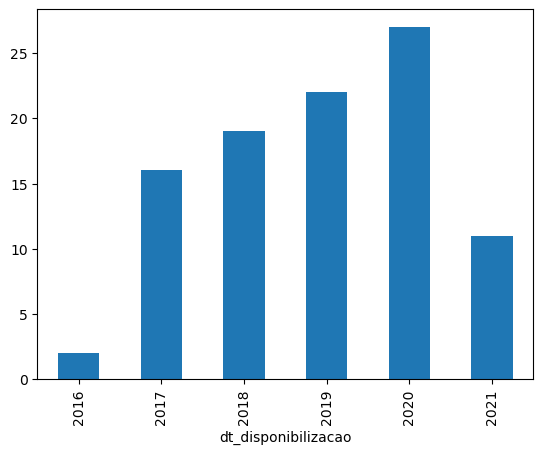

In [75]:
df_tratado_brasil['dt_disponibilizacao'].dt.year.value_counts().sort_index().plot(kind='bar')

## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?

Resposta: Os diretores brasileiros com maior número de títulos são: **Lucas Margutti** e **Diego Pignataro**.

In [77]:
df_tratado_brasil['diretor'].value_counts()

diretor
Lucas Margutti                  3
Diego Pignataro                 3
Marcelo Galvão                  2
Alexandre Avancini              2
Bruno Garotti                   2
                               ..
Petra Costa, Lea Glob           1
Wagner de Assis                 1
Fernando Ayllón                 1
Cavi Borges, Luciano Vidigal    1
Tiffanie Hsu                    1
Name: count, Length: 61, dtype: int64

## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?

Resposta: Existem mais conteúdos para crianças e adolescentes. Total de 4.702 títulos.

In [78]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [79]:
df_tratado['classificacao'].value_counts()

classificacao
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [80]:
adultos = ['TV-MA', 'NR', 'R']
crianca_adolescente = ['TV-14','TV-PG', 'PG-13', 'TV-Y7', 'TV-Y', 'PG' , 'TV-G', 'G' ]

In [83]:
# conteúdo adulto
df_tratado.query("classificacao in @adultos").shape

(4086, 12)

In [84]:
# conteúdo para crianças e adolescentes
df_tratado.query("classificacao in @crianca_adolescente").shape

(4702, 12)

## 13 - Qual é o mês do ano em que a Netflix tradicionalmente adiciona mais conteúdo original?

Resposta: O mês 7 é o que a Netflix mais adiciona conteúdo original

In [60]:
mes_disponibilizacao = df_tratado['dt_disponibilizacao'].dt.month.value_counts().astype(np.int64)

dt_disponibilizacao
7.0     827
12.0    813
9.0     770
4.0     764
10.0    760
8.0     755
3.0     742
1.0     738
6.0     728
11.0    705
5.0     632
2.0     563
Name: count, dtype: int64

<Axes: title={'center': 'Lançamentos por mês'}, xlabel='dt_disponibilizacao'>

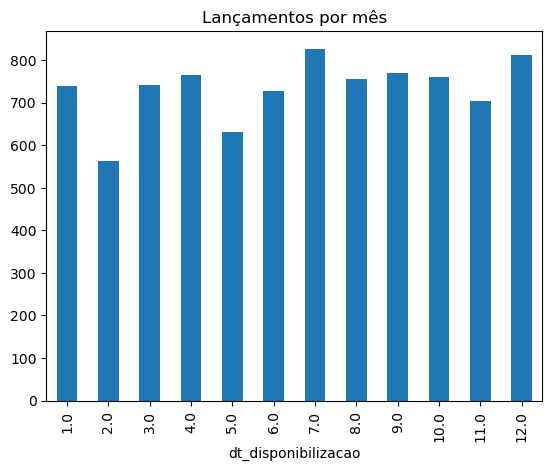

In [76]:
mes_disponibilizacao.sort_index().plot(kind='bar', title='Lançamentos por mês')